In [ ]:
# clustering_exercises

# Clustering

## Workflow

### - Throughout the exercises, you may wish to do your work in a notebook, then transfer any functions you've created to an external python script.

### - Keep in mind this is not always a linear process! You will probably be cycling between a notebook and an external python script frequently.

### - Remember to run your code often to check for correct output and/or errors.

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
# matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire_1
import wrangle_zillow
# import summarize
# import prepare

# Zillow

### For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

### You will have a zillow.ipynb file and a helper file for each section in the pipeline.

In [2]:
df = acquire_1.get_zillow_data()

df.head()

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,14297519,0.03,3.50,4.00,"3,100.00","6,059.00","33,634,931.00","-117,869,207.00","4,506.00",261.00,"53,571.00","1,286.00","96,978.00","1,998.00","485,713.00","1,023,282.00","537,569.00","11,013.72"
1,17052889,0.06,1.00,2.00,"1,465.00","6,111.00","34,449,266.00","-119,281,531.00","12,647.00",261.00,"13,091.00","2,061.00","97,099.00","1,967.00","88,000.00","464,000.00","376,000.00","5,672.48"
2,14186244,0.01,2.00,3.00,"1,243.00","6,059.00","33,886,168.00","-117,823,170.00","8,432.00",261.00,"21,412.00","1,286.00","97,078.00","1,962.00","85,289.00","564,778.00","479,489.00","6,488.30"
3,12177905,-0.10,3.00,4.00,"2,376.00","6,037.00","34,245,180.00","-118,240,722.00","13,038.00",261.00,"396,551.00","3,101.00","96,330.00","1,970.00","108,918.00","145,143.00","36,225.00","1,777.51"
4,12095076,-0.00,3.00,4.00,"2,962.00","6,037.00","34,145,202.00","-118,179,824.00","63,000.00",261.00,"47,019.00","3,101.00","96,293.00","1,950.00","276,684.00","773,303.00","496,619.00","9,516.26"


In [4]:
df = wrangle_zillow.prepare_zillow(df)

In [6]:
df.head() # check_yo_head

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,...,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura
0,14297519,0.03,3.50,4.00,"3,100.00","6,059.00","33,634,931.00","-117,869,207.00","4,506.00",261.00,...,"1,286.00","96,978.00","1,998.00","485,713.00","1,023,282.00","537,569.00","11,013.72",0,1,0
1,17052889,0.06,1.00,2.00,"1,465.00","6,111.00","34,449,266.00","-119,281,531.00","12,647.00",261.00,...,"2,061.00","97,099.00","1,967.00","88,000.00","464,000.00","376,000.00","5,672.48",0,0,1
2,14186244,0.01,2.00,3.00,"1,243.00","6,059.00","33,886,168.00","-117,823,170.00","8,432.00",261.00,...,"1,286.00","97,078.00","1,962.00","85,289.00","564,778.00","479,489.00","6,488.30",0,1,0
3,12177905,-0.10,3.00,4.00,"2,376.00","6,037.00","34,245,180.00","-118,240,722.00","13,038.00",261.00,...,"3,101.00","96,330.00","1,970.00","108,918.00","145,143.00","36,225.00","1,777.51",1,0,0
4,12095076,-0.00,3.00,4.00,"2,962.00","6,037.00","34,145,202.00","-118,179,824.00","63,000.00",261.00,...,"3,101.00","96,293.00","1,950.00","276,684.00","773,303.00","496,619.00","9,516.26",1,0,0


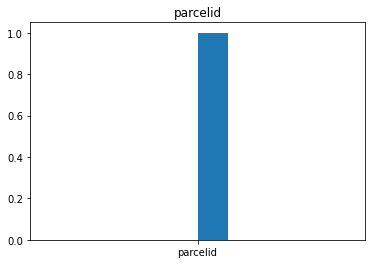

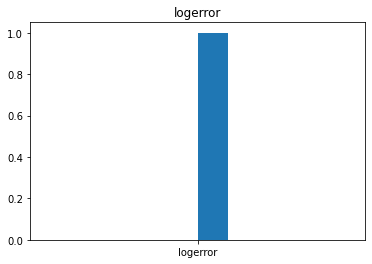

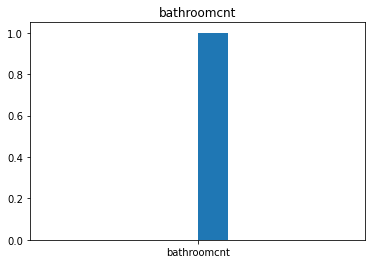

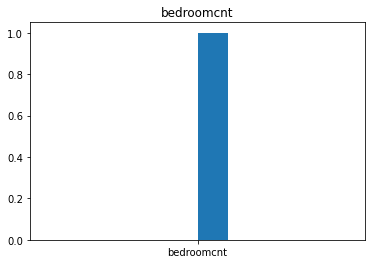

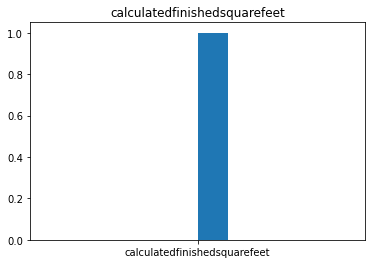

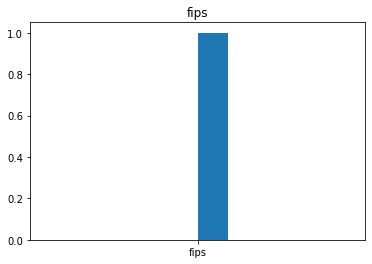

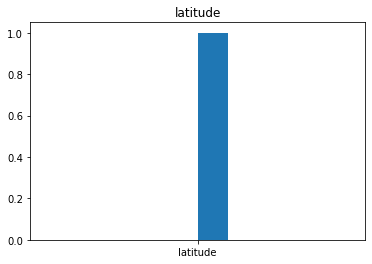

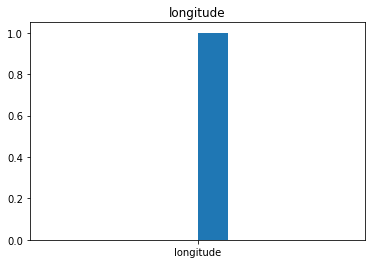

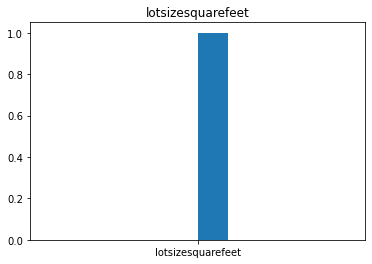

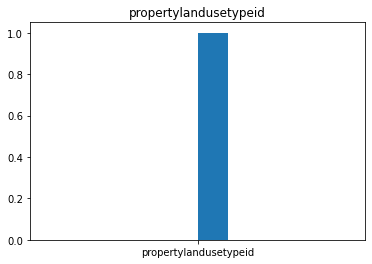

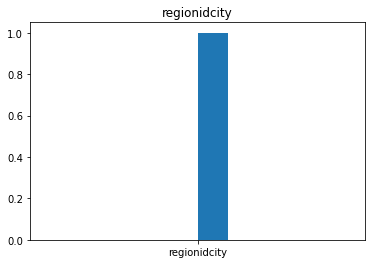

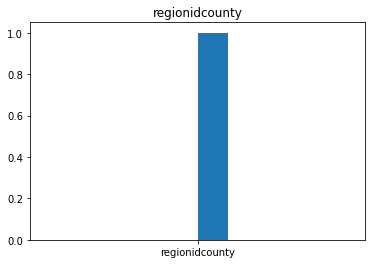

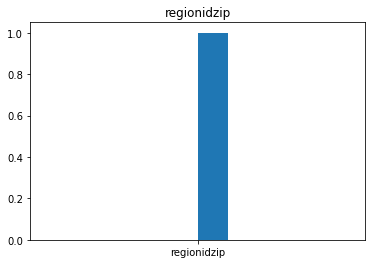

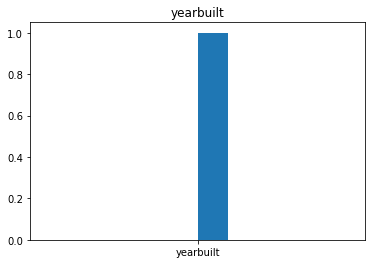

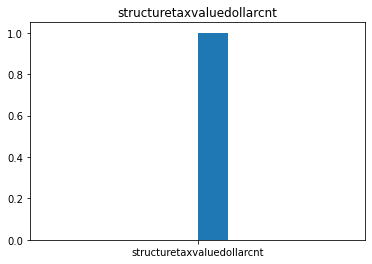

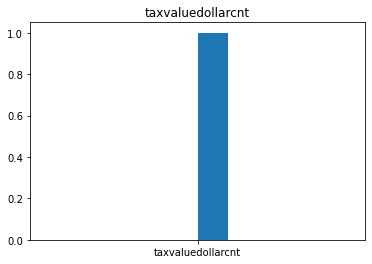

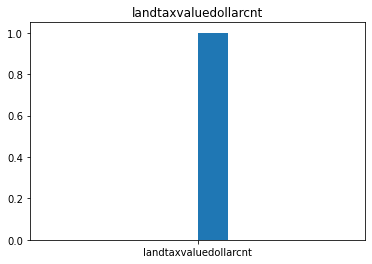

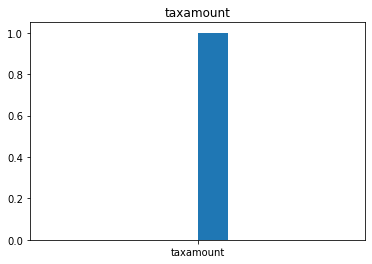

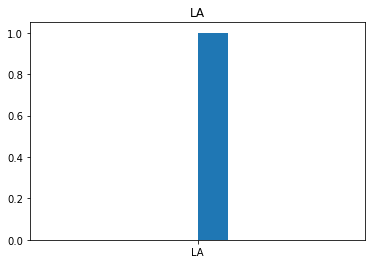

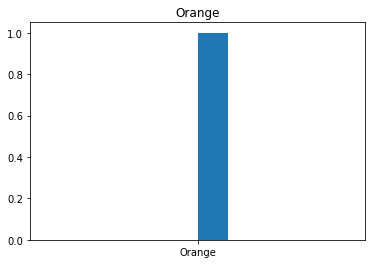

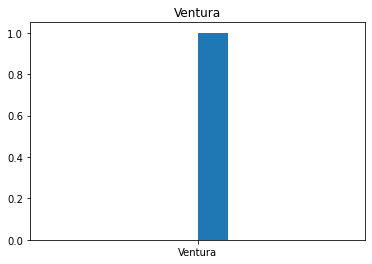

In [12]:
for col in df.columns:
    #plt.figure(figsize=(4,2))
    plt.hist([col])
    plt.title(col)
    plt.show()

In [ ]:
sns.pairplot(df.sample(frac=0.10, replace=True, random_state=1), hue='logerror')
plt.show()

In [ ]:
sns.boxplot(df.sample(frac=0.10, replace=True, random_state=1).logerror, df.sample(frac=0.10, replace=True, random_state=1).LA)
plt.title("Is there a difference in logerror vs. LA?")
plt.show()

In [ ]:
sns.boxplot(df.sample(frac=0.10, replace=True, random_state=1).logerror, df.sample(frac=0.10, replace=True, random_state=1).Orange)
plt.title("Is there a difference in logerror vs. Orange?")
plt.show()

In [ ]:
sns.boxplot(df.sample(frac=0.10, replace=True, random_state=1).logerror, df.sample(frac=0.10, replace=True, random_state=1).Ventura)
plt.title("Is there a difference in logerror vs. Ventura?")
plt.show()

In [ ]:
sns.jointplot(x="logerror", y="bathroomcnt", data=df.sample(frac=0.10, replace=True, random_state=1))
plt.xlabel("Logerror")
plt.ylabel("Bathroomcnt")
plt.show()

In [ ]:
# sql zillow example

use zillow;

/* are there duplicate parcels in the predictions table? */
select parcelid, count(*)
from predictions_2017
group by parcelid
having count(*) > 1;

/* is this the case in the properties table? any duplicate parcels? */
select parcelid, count(*)
from properties_2017
group by parcelid
having count(*) > 1;

/* we need the latest transaction date for each parcelid */
select parcelid, max(transactiondate) as transactiondate
from predictions_2017
group by parcelid;

/* how can we confirm this removed the duplicates */
-- 1. how many rows did we start out with? 
select count(*) from predictions_2017; 
-- 77,614

-- 2. how many rows do we have when we group by parcelid? 
select count(*) from 
(select parcelid, max(transactiondate) as transactiondate
from predictions_2017
group by parcelid
) a
;
-- 77,414

-- we want the info from properties table and the date and logerror from the predictions table

-- 2. next I selected 2 columns from the primary table (properties_2017) and inner joined with the txn date subquery
select 	prop.parcelid, 
			prop.airconditioningtypeid,
            ac.airconditioningdesc,-- 4. finally I did a left join with the airconditioning table to get the description. 
            txn.transactiondate, 
            pred.logerror -- 3.i joined with the predictions table again to get the log error that is associated with the parcel AND transaction date
            -- (see join below labeled #3)
from properties_2017 prop
join 
	(
    -- 1. this is what i did first...create a dataset with each parcelid and their last transaction date. 
    select parcelid, max(transactiondate) as transactiondate
	from predictions_2017
	group by parcelid
	) as txn on prop.parcelid = txn.parcelid  -- using(parcelid)

-- # 3:     
join predictions_2017 as pred  on prop.parcelid = pred.parcelid and pred.transactiondate = txn.transactiondate -- using(parcelid, transactiondate)

-- #4: left join otherwise we would have dropped a TON of rows due to all the nulls 
left join airconditioningtype as ac on prop.airconditioningtypeid = ac.airconditioningtypeid
;

/* i can verify we have the correct number of rows by wrapping the entire query in a count */

select count(*) from 
(
-- 2. next I selected 2 columns from the primary table (properties_2017) and inner joined with the txn date subquery
			select 	prop.parcelid, 
						prop.airconditioningtypeid,
						ac.airconditioningdesc,-- 4. finally I did a left join with the airconditioning table to get the description. 
						txn.transactiondate, 
						pred.logerror -- 3.i joined with the predictions table again to get the log error that is associated with the parcel AND transaction date
						-- (see join below labeled #3)
			from properties_2017 prop
			join 
				(
				-- 1. this is what i did first...create a dataset with each parcelid and their last transaction date. 
				select parcelid, max(transactiondate) as transactiondate
				from predictions_2017
				group by parcelid
				) as txn on prop.parcelid = txn.parcelid  -- using(parcelid)

			-- # 3:     
			join predictions_2017 as pred  on prop.parcelid = pred.parcelid and pred.transactiondate = txn.transactiondate -- using(parcelid, transactiondate)

			-- #4: left join otherwise we would have dropped a TON of rows due to all the nulls 
			left join airconditioningtype as ac on prop.airconditioningtypeid = ac.airconditioningtypeid
) AS a -- because subqueries need to be aliased. 
;

select * from predictions_2017
where parcelid = 11721753;

join predictions_2017 as pred  on prop.parcelid = pred.parcelid and pred.transactiondate = txn.transactiondate -- using(parcelid, transactiondate)